In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV test data separetly into a DataFrame
data1 = pd.read_csv('results/Llama2/1st_llama2_aigenerated_13_experiment_1691607036476.csv')

# Concatenate the two test data
df = pd.concat([data1], ignore_index=True)
df

,llm_model,temperature,system_prompt,user_prompt,score
0,upstage/Llama-2-70b-instruct-v2,0,aigenerated_13.txt,CONVERT_TEXT_TO_SPEECH.txt - 0,3
1,upstage/Llama-2-70b-instruct-v2,0,aigenerated_13.txt,CONVERT_TEXT_TO_SPEECH.txt - 1,2
2,upstage/Llama-2-70b-instruct-v2,0,aigenerated_13.txt,CONVERT_TEXT_TO_SPEECH.txt - 2,2
3,upstage/Llama-2-70b-instruct-v2,0,aigenerated_13.txt,CONVERT_TEXT_TO_SPEECH.txt - 3,1
4,upstage/Llama-2-70b-instruct-v2,0,aigenerated_13.txt,CONVERT_TEXT_TO_SPEECH.txt - 4,2
...,...,...,...,...,...
316,upstage/Llama-2-70b-instruct-v2,0,aigenerated_13.txt,SEND_EMAIL.txt - 15,2
317,upstage/Llama-2-70b-instruct-v2,0,aigenerated_13.txt,SEND_EMAIL.txt - 16,2
318,upstage/Llama-2-70b-instruct-v2,0,aigenerated_13.txt,SEND_EMAIL.txt - 17,2
319,upstage/Llama-2-70b-instruct-v2,0,aigenerated_13.txt,SEND_EMAIL.txt - 18,2


In [11]:
data1.head

<bound method NDFrame.head of                            llm_model  temperature       system_prompt   
0    upstage/Llama-2-70b-instruct-v2            0  aigenerated_13.txt  \
1    upstage/Llama-2-70b-instruct-v2            0  aigenerated_13.txt   
2    upstage/Llama-2-70b-instruct-v2            0  aigenerated_13.txt   
3    upstage/Llama-2-70b-instruct-v2            0  aigenerated_13.txt   
4    upstage/Llama-2-70b-instruct-v2            0  aigenerated_13.txt   
..                               ...          ...                 ...   
316  upstage/Llama-2-70b-instruct-v2            0  aigenerated_13.txt   
317  upstage/Llama-2-70b-instruct-v2            0  aigenerated_13.txt   
318  upstage/Llama-2-70b-instruct-v2            0  aigenerated_13.txt   
319  upstage/Llama-2-70b-instruct-v2            0  aigenerated_13.txt   
320  upstage/Llama-2-70b-instruct-v2            0  aigenerated_13.txt   

                        user_prompt  score  
0    CONVERT_TEXT_TO_SPEECH.txt - 0      3  
1  

In [12]:
data2.head

<bound method NDFrame.head of                            llm_model  temperature       system_prompt   
0    upstage/Llama-2-70b-instruct-v2            0  aigenerated_13.txt  \
1    upstage/Llama-2-70b-instruct-v2            0  aigenerated_13.txt   
2    upstage/Llama-2-70b-instruct-v2            0  aigenerated_13.txt   
3    upstage/Llama-2-70b-instruct-v2            0  aigenerated_13.txt   
4    upstage/Llama-2-70b-instruct-v2            0  aigenerated_13.txt   
..                               ...          ...                 ...   
316  upstage/Llama-2-70b-instruct-v2            0  aigenerated_13.txt   
317  upstage/Llama-2-70b-instruct-v2            0  aigenerated_13.txt   
318  upstage/Llama-2-70b-instruct-v2            0  aigenerated_13.txt   
319  upstage/Llama-2-70b-instruct-v2            0  aigenerated_13.txt   
320  upstage/Llama-2-70b-instruct-v2            0  aigenerated_13.txt   

                        user_prompt  score  
0    CONVERT_TEXT_TO_SPEECH.txt - 0    3.0  
1  

In [13]:
# filter and clean the data by excluding unwanted columns
df['user_prompt'] = df['user_prompt'].str.split('.').str[0]
filtered_df = df[['user_prompt', 'score']]
filtered_df

,user_prompt,score
0,CONVERT_TEXT_TO_SPEECH,3
1,CONVERT_TEXT_TO_SPEECH,2
2,CONVERT_TEXT_TO_SPEECH,2
3,CONVERT_TEXT_TO_SPEECH,1
4,CONVERT_TEXT_TO_SPEECH,2
...,...,...
316,SEND_EMAIL,2
317,SEND_EMAIL,2
318,SEND_EMAIL,2
319,SEND_EMAIL,2


In [14]:
# Identify the unique scores
unique_scores = [0, 1, 2, 3]  # the score is to confusion matrix as TP=3, FP=2, FN=1 and TN=0.

# Count the occurrences of each score for each user_prompt
summary_aigen13_zeroshot = df.groupby('user_prompt')['score'].value_counts().unstack()

# Ensure all scores are represented in the columns, filling with 0 where necessary
summary_aigen13_zeroshot = summary_aigen13_zeroshot.reindex(columns=unique_scores).fillna(0)

# Rename the columns as desired (cnfusion matrix)
summary_aigen13_zeroshot.columns = ['TN', 'FN', 'FP', 'TP']
summary_aigen13_zeroshot


,TN,FN,FP,TP
user_prompt,,,,
CONVERT_TEXT_TO_SPEECH,0.0,5.0,14.0,1.0
CREATE_CALENDAR_EVENT,0.0,1.0,19.0,0.0
CREATE_REMINDER,0.0,0.0,20.0,0.0
GENERATE_IMAGE,0.0,4.0,16.0,0.0
GET_CALENDAR_EVENTS,0.0,2.0,18.0,0.0
GET_CURRENT_DATE_AND_TIME,0.0,6.0,1.0,13.0
GET_CURRENT_STOCK_PRICE,0.0,2.0,11.0,7.0
GET_NEWS,1.0,8.0,11.0,0.0
GET_WEATHER,0.0,0.0,19.0,1.0


In [15]:
# Add a row for the cumulative sum of each column
sum_row = summary_aigen13_zeroshot.sum(numeric_only=True)
df_sum = pd.DataFrame([sum_row], index=["Cumulative"])
summary_aigen13_zeroshot = pd.concat([summary_aigen13_zeroshot, df_sum])
summary_aigen13_zeroshot.index.name = "APIs"

In [16]:
# Calculate Precision, Recall, and F1 Score
summary_aigen13_zeroshot['Precision'] = summary_aigen13_zeroshot['TP'] / (summary_aigen13_zeroshot['TP'] + summary_aigen13_zeroshot['FP'])
summary_aigen13_zeroshot['Recall'] = summary_aigen13_zeroshot['TP'] / (summary_aigen13_zeroshot['TP'] + summary_aigen13_zeroshot['FN'])
summary_aigen13_zeroshot['F1 Score'] = 2 * (summary_aigen13_zeroshot['Precision'] * summary_aigen13_zeroshot['Recall']) / (summary_aigen13_zeroshot['Precision'] + summary_aigen13_zeroshot['Recall'])

# Round to 2 decimal places
summary_aigen13_zeroshot['Precision'] = summary_aigen13_zeroshot['Precision'].round(2)
summary_aigen13_zeroshot['Recall'] = summary_aigen13_zeroshot['Recall'].round(2)
summary_aigen13_zeroshot['F1 Score'] = summary_aigen13_zeroshot['F1 Score'].round(2)

# Handle possible NaN values (caused by divisions by zero)
summary_aigen13_zeroshot.fillna(0, inplace=True)

# Stire the results summary in a csv file
summary_aigen13_zeroshot.to_csv('summary_llama2_using_aigen13_zeroshot.csv', index=True)

print(summary_aigen13_zeroshot)

                              TN    FN     FP    TP  Precision  Recall   
APIs                                                                     
CONVERT_TEXT_TO_SPEECH       0.0   5.0   14.0   1.0       0.07    0.17  \
CREATE_CALENDAR_EVENT        0.0   1.0   19.0   0.0       0.00    0.00   
CREATE_REMINDER              0.0   0.0   20.0   0.0       0.00    0.00   
GENERATE_IMAGE               0.0   4.0   16.0   0.0       0.00    0.00   
GET_CALENDAR_EVENTS          0.0   2.0   18.0   0.0       0.00    0.00   
GET_CURRENT_DATE_AND_TIME    0.0   6.0    1.0  13.0       0.93    0.68   
GET_CURRENT_STOCK_PRICE      0.0   2.0   11.0   7.0       0.39    0.78   
GET_NEWS                     1.0   8.0   11.0   0.0       0.00    0.00   
GET_WEATHER                  0.0   0.0   19.0   1.0       0.05    1.00   
NOT_AVAILABLE              108.0   0.0   13.0   0.0       0.00    0.00   
SEND_EMAIL                   0.0   0.0   20.0   0.0       0.00    0.00   
Cumulative                 109.0  28.0

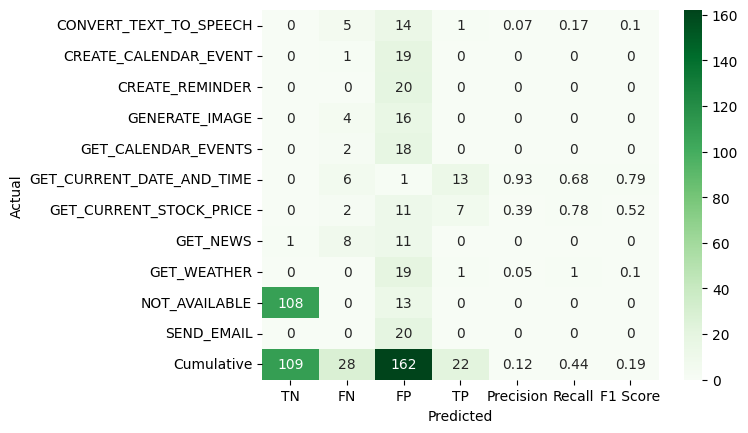

In [17]:
# Plot the confusion matrix
sns.heatmap(summary_aigen13_zeroshot, annot=True, cmap='Greens', fmt='g'), plt.xlabel('Predicted'), plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [18]:
# Generate the DataFrame to LaTeX format so that it can be copied and pasted into our thesis
# Formatting TN, FN, FP, and TP columns to 0 decimal places
for col in ['TN', 'FN', 'FP', 'TP']:
    summary_aigen13_zeroshot[col] = summary_aigen13_zeroshot[col].astype(int)

# Formatting the 'Precision', 'Recall', and 'F1 Score' columns to 2 decimal places
for col in ['Precision', 'Recall', 'F1 Score']:
    summary_aigen13_zeroshot[col] = summary_aigen13_zeroshot[col].round(2)

# Convert the DataFrame to LaTeX
latex_code = summary_aigen13_zeroshot.to_latex(float_format="%.2f")
print(latex_code)

\begin{tabular}{lrrrrrrr}
\toprule
 & TN & FN & FP & TP & Precision & Recall & F1 Score \\
APIs &  &  &  &  &  &  &  \\
\midrule
CONVERT_TEXT_TO_SPEECH & 0 & 5 & 14 & 1 & 0.07 & 0.17 & 0.10 \\
CREATE_CALENDAR_EVENT & 0 & 1 & 19 & 0 & 0.00 & 0.00 & 0.00 \\
CREATE_REMINDER & 0 & 0 & 20 & 0 & 0.00 & 0.00 & 0.00 \\
GENERATE_IMAGE & 0 & 4 & 16 & 0 & 0.00 & 0.00 & 0.00 \\
GET_CALENDAR_EVENTS & 0 & 2 & 18 & 0 & 0.00 & 0.00 & 0.00 \\
GET_CURRENT_DATE_AND_TIME & 0 & 6 & 1 & 13 & 0.93 & 0.68 & 0.79 \\
GET_CURRENT_STOCK_PRICE & 0 & 2 & 11 & 7 & 0.39 & 0.78 & 0.52 \\
GET_NEWS & 1 & 8 & 11 & 0 & 0.00 & 0.00 & 0.00 \\
GET_WEATHER & 0 & 0 & 19 & 1 & 0.05 & 1.00 & 0.10 \\
NOT_AVAILABLE & 108 & 0 & 13 & 0 & 0.00 & 0.00 & 0.00 \\
SEND_EMAIL & 0 & 0 & 20 & 0 & 0.00 & 0.00 & 0.00 \\
Cumulative & 109 & 28 & 162 & 22 & 0.12 & 0.44 & 0.19 \\
\bottomrule
\end{tabular}

